# IMPORTING USEFUL LIBRARIES
imported libraries with alies name

In [119]:
import re 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import ydata_profiling 
from ydata_profiling import ProfileReport
import pygwalker as pg


In [26]:
#Importing the url of the source websites from which we extract the data
Url = 'https://www.shiksha.com/engineering/colleges/b-tech-colleges-india?rf=searchWidget&landing=ctp'

In [27]:
#by requests module , asked for permission to scrap the data using requests.get
Scrap_Page = requests.get(Url,headers = {'User-Agent':'Mozilla/5.0'})

In [28]:
#after requests, checked the status code of request. if it is yes , then it shows 200 . and if it is not then it will show 403
Scrap_Page.status_code

200

In [120]:
#As we know that we need lists to create a dataframe, so first we create an empty lists
College_Name = [] #empty list of college names
Ratings = [] #empty list of ratings
Courses_offered = [] #empty  list of courses offered
Annual_Package = [] # empty list of annual package
Fee_Range = [] #empty list of fee range
Location = [] #empty list of location of college
College_Type = [] #empty list of type of college
Entrance_Exams = [] #empty list of entrance exam for entry in college

#extracted the required tags and classs of the data and created soup for the required data and putted into for loop 

#As we need multiple pages to scrap  through a single website, so we putted the Url into the for loop in range of required pages

for i in range(1 ,25): # as we need 25 pages to scrap
    Url = f'https://www.shiksha.com/engineering/colleges/b-tech-colleges-india-{i}?rf=searchWidget&landing=ctp'
    Scrap_Page = requests.get(Url,headers = {'User-Agent':'Mozilla/5.0'})
    Soup = BeautifulSoup(Scrap_Page.text, 'html.parser')
    Name_Soup  = Soup.find_all('div' , attrs = {'class':'c8ff'})
    Course_Soup  = Soup.find_all('a' , attrs = {'class':'_9865 ripple dark'})
    Multiple_Soup  = Soup.find_all('div' , attrs = {'class':'cd4f _5c64 contentColumn_2'})
    City_Soup = Soup.find_all('span' , attrs = {'class':'_5588'})
    Type_Soup = Soup.find_all('div' , attrs = {'class':'edfa'})
    #After data scrapping , we need to add the data in a list so we are appending the empty lists which already created
    
    for i in Name_Soup:
        College_Name.append(i.text)#by  using loop , extracted the data and added into empty lists
        
    for i in City_Soup:
        Location.append(i.text) #using for loop , extracted the data and added into empty lists
        
    for i in Course_Soup:
        Courses_offered.append(i.text) # by using for loop , extracted the data and added into empty lists
        
    for i in Multiple_Soup:
        z = i.text
        z_= re.findall('Range₹\d+' , z) #here we used 're' library to extract the useful data 
        if z_:
            Fee_Range.append(z_[0])   #egex module , we added the fee range data  to empty list
        else:
            Fee_Range.append(np.nan)
        
    for i in Multiple_Soup:
        a = i.text
        f = re.findall('Courses(\d\.\d)' , a) # again we use 're' to do the same
        if f:
            Ratings.append(f[0])#dded to the empty list of Ratings
        else:
            Ratings.append(np.nan)
        
        
        
    for i in Multiple_Soup:
        y = i.text
        y_ = re.findall('Package₹\d+' , y) #here also used 're' module to extract the useful data
        if y_:
            Annual_Package.append(y_[0])# using 're' , added the data to empty list
        else:
            Annual_Package.append(np.nan)
        
        
    for i in Multiple_Soup:
        x = i.text
        x_=re.findall( r'Exams Accepted(.*?)Fees Range' , x) #again we use 're' to do extract the useful data
        Entrance_Exams.append(x_[0]) # using 're' , added the data to empty list
        
    for i in Type_Soup:
        h = i.text
        h_ = re.findall('Govt|Pvt' , h) # here we use 'or' condition in 're' and extracted the useful data
        if h_:
            College_Type.append(h_[0])     #g list attribute , added the extracted data to empty list
        else:
            College_Type.append(np.nan)

In [121]:
# Now checking the length and content of required lists we created
#first we are checking length using 'len' function
print(len(College_Name))
print(len(Ratings))
print(len(Courses_offered))
print(len(Annual_Package))
print(len(Fee_Range))
print(len(Location))
print(len(College_Type))
print(len(Entrance_Exams))

511
511
833
511
511
511
833
511


In [122]:
#After checking the length , we observed that courses offered and college type  tooks extra data
#so we are selecting(approved and checked)
Courses_Offered = Courses_offered[0:511]
College_Type1 = College_Type[0:511]

In [123]:
# Now we created a Dataframe named as Data using pandas library through our lists
#for this we need to create  dictionary first
Data = {'College Name':College_Name ,
        'College Location':Location ,
        'Rating':Ratings ,
        'College Type':College_Type1 ,
        'Entrance Exams':Entrance_Exams ,
        'Expected Fee':Fee_Range ,
        'Average Package':Annual_Package ,
       'Courses Offered':Courses_Offered}
#now creating Data Frame
College_Data = pd.DataFrame(Data)
College_Data

College Name  \
0          IIT Bombay - Indian Institute of Technology   
1           IIT Delhi - Indian Institute of Technology   
2                                          VIT Vellore   
3          IIT Madras - Indian Institute of Technology   
4                 DTU - Delhi Technological University   
..                                                 ...   
506  JSPM’s Bhivarabai Sawant Institute of Technolo...   
507                      Bansal College of Engineering   
508  University Institute of Technology, Jhabua - R...   
509  MET League of Colleges, Bhujbal Knowledge City...   
510                 RMD Sinhgad School of  Engineering   

           College Location Rating College Type  \
0                    Mumbai    4.6         Govt   
1                     Delhi    4.6         Govt   
2                   Vellore    4.2          Pvt   
3                   Chennai    4.6          NaN   
4                     Delhi    4.3          NaN   
..                      ...    ...          ...   
506                    Pune    4.3         Govt   
507  Madhya Pradesh - Other    4.1          Pvt   
508  Madhya Pradesh - Other    3.8          NaN   
509                  Nashik    4.2          NaN   
510                    Pune    3.7         Govt   

                                     Entrance Exams Expected Fee  \
0                        JEE MainJEE AdvancedTotal       Range₹8   
1                        JEE MainJEE AdvancedTotal       Range₹8   
2    TNEAVITEEECBSE 12thISCTamilnadu 12th +3 Total       Range₹5   
3                        JEE MainJEE AdvancedTotal       Range₹5   
4    JEE MainDASA UGJAC DelhiCBSE 12thISC +3 Total       Range₹3   
..                                              ...          ...   
506                           JEE MainMHT CETTotal       Range₹2   
507                             JEE MainMP BETotal       Range₹2   
508                                  JEE MainTotal           NaN   
509                           JEE MainMHT CETTotal       Range₹4   
510                           JEE MainMHT CETTotal       Range₹3   

    Average Package Courses Offered  
0         Package₹8      24 Courses  
1        Package₹15      18 Courses  
2         Package₹7      22 Courses  
3        Package₹15      25 Courses  
4         Package₹9      28 Courses  
..              ...             ...  
506             NaN       8 Courses  
507             NaN       6 Courses  
508             NaN       7 Courses  
509             NaN       4 Courses  
510             NaN      11 Courses  

[511 rows x 8 columns]

In [124]:
#As we can see that we need to refine the data as it contains some unuseful data
#so we are doing cleaning data for all the required columns by using pandas , type casting and by using by useful functions

College_Data["Courses Offered"] = College_Data["Courses Offered"].str.replace("Courses|Course"," ")
College_Data["Expected Fee"] = College_Data["Expected Fee"].str.replace("Range₹"," ")
College_Data["Average Package"] = College_Data["Average Package"].str.replace("Package₹"," ")
College_Data  ##Again checking the data frame after applying cleaning process

College Name  \
0          IIT Bombay - Indian Institute of Technology   
1           IIT Delhi - Indian Institute of Technology   
2                                          VIT Vellore   
3          IIT Madras - Indian Institute of Technology   
4                 DTU - Delhi Technological University   
..                                                 ...   
506  JSPM’s Bhivarabai Sawant Institute of Technolo...   
507                      Bansal College of Engineering   
508  University Institute of Technology, Jhabua - R...   
509  MET League of Colleges, Bhujbal Knowledge City...   
510                 RMD Sinhgad School of  Engineering   

           College Location Rating College Type  \
0                    Mumbai    4.6         Govt   
1                     Delhi    4.6         Govt   
2                   Vellore    4.2          Pvt   
3                   Chennai    4.6          NaN   
4                     Delhi    4.3          NaN   
..                      ...    ...          ...   
506                    Pune    4.3         Govt   
507  Madhya Pradesh - Other    4.1          Pvt   
508  Madhya Pradesh - Other    3.8          NaN   
509                  Nashik    4.2          NaN   
510                    Pune    3.7         Govt   

                                     Entrance Exams Expected Fee  \
0                        JEE MainJEE AdvancedTotal             8   
1                        JEE MainJEE AdvancedTotal             8   
2    TNEAVITEEECBSE 12thISCTamilnadu 12th +3 Total             5   
3                        JEE MainJEE AdvancedTotal             5   
4    JEE MainDASA UGJAC DelhiCBSE 12thISC +3 Total             3   
..                                              ...          ...   
506                           JEE MainMHT CETTotal             2   
507                             JEE MainMP BETotal             2   
508                                  JEE MainTotal           NaN   
509                           JEE MainMHT CETTotal             4   
510                           JEE MainMHT CETTotal             3   

    Average Package Courses Offered  
0                 8            24    
1                15            18    
2                 7            22    
3                15            25    
4                 9            28    
..              ...             ...  
506             NaN             8    
507             NaN             6    
508             NaN             7    
509             NaN             4    
510             NaN            11    

[511 rows x 8 columns]

In [125]:
#Now we saved the data to our directory by using to_csv 
College_Data.to_csv("DataProject.csv")
pd.read_csv("DataProject.csv") #agaiun opened in read mode for checking

Unnamed: 0                                       College Name  \
0             0        IIT Bombay - Indian Institute of Technology   
1             1         IIT Delhi - Indian Institute of Technology   
2             2                                        VIT Vellore   
3             3        IIT Madras - Indian Institute of Technology   
4             4               DTU - Delhi Technological University   
..          ...                                                ...   
506         506  JSPM’s Bhivarabai Sawant Institute of Technolo...   
507         507                      Bansal College of Engineering   
508         508  University Institute of Technology, Jhabua - R...   
509         509  MET League of Colleges, Bhujbal Knowledge City...   
510         510                 RMD Sinhgad School of  Engineering   

           College Location  Rating College Type  \
0                    Mumbai     4.6         Govt   
1                     Delhi     4.6         Govt   
2                   Vellore     4.2          Pvt   
3                   Chennai     4.6          NaN   
4                     Delhi     4.3          NaN   
..                      ...     ...          ...   
506                    Pune     4.3         Govt   
507  Madhya Pradesh - Other     4.1          Pvt   
508  Madhya Pradesh - Other     3.8          NaN   
509                  Nashik     4.2          NaN   
510                    Pune     3.7         Govt   

                                     Entrance Exams  Expected Fee  \
0                        JEE MainJEE AdvancedTotal            8.0   
1                        JEE MainJEE AdvancedTotal            8.0   
2    TNEAVITEEECBSE 12thISCTamilnadu 12th +3 Total            5.0   
3                        JEE MainJEE AdvancedTotal            5.0   
4    JEE MainDASA UGJAC DelhiCBSE 12thISC +3 Total            3.0   
..                                              ...           ...   
506                           JEE MainMHT CETTotal            2.0   
507                             JEE MainMP BETotal            2.0   
508                                  JEE MainTotal            NaN   
509                           JEE MainMHT CETTotal            4.0   
510                           JEE MainMHT CETTotal            3.0   

     Average Package  Courses Offered  
0                8.0               24  
1               15.0               18  
2                7.0               22  
3               15.0               25  
4                9.0               28  
..               ...              ...  
506              NaN                8  
507              NaN                6  
508              NaN                7  
509              NaN                4  
510              NaN               11  

[511 rows x 9 columns]

In [127]:
#first we are checking missing values

College_Data.isna().sum()


College Name          0
College Location      0
Rating               18
College Type        207
Entrance Exams        0
Expected Fee         12
Average Package      84
Courses Offered       0
dtype: int64

In [128]:
##As  we can see that there are 207 missing values in College type's column 
#and 18 , 12 , 84 missing values in Rating's column , Expected fee's and Average package's column.

#So by usind pandas statistics functions or approach we are filling the missing values.

In [198]:
#as the data is object , so we imputed the  value on the based of mode

College_Data["Rating"].fillna(value = College_Data["Rating"].mode()[0] , inplace=True)
College_Data["College Type"].fillna(value = College_Data["College Type"].mode()[0] , inplace=True)
College_Data["Expected Fee"].fillna(value = College_Data["Expected Fee"].mode()[0] , inplace=True)
College_Data["Average Package"].fillna(value = College_Data["Average Package"].mode()[0] , inplace=True)
College_Data

College Name  \
0          IIT Bombay - Indian Institute of Technology   
1           IIT Delhi - Indian Institute of Technology   
2                                          VIT Vellore   
3          IIT Madras - Indian Institute of Technology   
4                 DTU - Delhi Technological University   
..                                                 ...   
506  JSPM’s Bhivarabai Sawant Institute of Technolo...   
507                      Bansal College of Engineering   
508  University Institute of Technology, Jhabua - R...   
509  MET League of Colleges, Bhujbal Knowledge City...   
510                 RMD Sinhgad School of  Engineering   

           College Location  Rating College Type  \
0                    Mumbai     4.6         Govt   
1                     Delhi     4.6         Govt   
2                   Vellore     4.2          Pvt   
3                   Chennai     4.6          Pvt   
4                     Delhi     4.3          Pvt   
..                      ...     ...          ...   
506                    Pune     4.3         Govt   
507  Madhya Pradesh - Other     4.1          Pvt   
508  Madhya Pradesh - Other     3.8          Pvt   
509                  Nashik     4.2          Pvt   
510                    Pune     3.7         Govt   

                                     Entrance Exams  Expected Fee  \
0                        JEE MainJEE AdvancedTotal              8   
1                        JEE MainJEE AdvancedTotal              8   
2    TNEAVITEEECBSE 12thISCTamilnadu 12th +3 Total              5   
3                        JEE MainJEE AdvancedTotal              5   
4    JEE MainDASA UGJAC DelhiCBSE 12thISC +3 Total              3   
..                                              ...           ...   
506                           JEE MainMHT CETTotal              2   
507                             JEE MainMP BETotal              2   
508                                  JEE MainTotal              2   
509                           JEE MainMHT CETTotal              4   
510                           JEE MainMHT CETTotal              3   

     Average Package  Courses Offered  
0                  8               24  
1                 15               18  
2                  7               22  
3                 15               25  
4                  9               28  
..               ...              ...  
506                4                8  
507                4                6  
508                4                7  
509                4                4  
510                4               11  

[511 rows x 8 columns]

In [130]:
#Again checking for missing values

College_Data.isna().sum()

College Name        0
College Location    0
Rating              0
College Type        0
Entrance Exams      0
Expected Fee        0
Average Package     0
Courses Offered     0
dtype: int64

In [135]:
#Now checking for duplicate values using pandas

College_Data.duplicated().sum()

#No duplicate values find 

0

Type Casting by checking data info

In [136]:
College_Data.info()  #information about data type , values , size , memory etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   College Name      511 non-null    object 
 1   College Location  511 non-null    object 
 2   Rating            511 non-null    float64
 3   College Type      511 non-null    object 
 4   Entrance Exams    511 non-null    object 
 5   Expected Fee      511 non-null    int32  
 6   Average Package   511 non-null    int32  
 7   Courses Offered   511 non-null    int32  
dtypes: float64(1), int32(3), object(4)
memory usage: 26.1+ KB


In [137]:
#Type casting of data according to their uses

College_Data["Courses Offered"] = College_Data["Courses Offered"].astype(int)
College_Data["Rating"] = College_Data["Rating"].astype(float)
College_Data["Expected Fee"] = College_Data["Expected Fee"].astype(int)
College_Data["Average Package"] = College_Data["Average Package"].astype(int)

Attributes

In [138]:
College_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   College Name      511 non-null    object 
 1   College Location  511 non-null    object 
 2   Rating            511 non-null    float64
 3   College Type      511 non-null    object 
 4   Entrance Exams    511 non-null    object 
 5   Expected Fee      511 non-null    int32  
 6   Average Package   511 non-null    int32  
 7   Courses Offered   511 non-null    int32  
dtypes: float64(1), int32(3), object(4)
memory usage: 26.1+ KB


In [139]:
College_Data.describe()  #to  check data on basis of descriptive statistics 

Rating  Expected Fee  Average Package  Courses Offered
count  511.000000    511.000000       511.000000        511.00000
mean     3.967515      7.534247         5.041096         13.95499
std      0.331842     14.227504         2.911821         10.82897
min      1.400000      1.000000         0.000000          1.00000
25%      3.800000      2.000000         4.000000          7.00000
50%      4.000000      4.000000         4.000000         11.00000
75%      4.200000      6.000000         6.000000         17.00000
max      4.800000    100.000000        23.000000         67.00000

In [140]:
#Now we are checking the first five data from data frame using df.head

College_Data.head()

College Name College Location  Rating  \
0  IIT Bombay - Indian Institute of Technology           Mumbai     4.6   
1   IIT Delhi - Indian Institute of Technology            Delhi     4.6   
2                                  VIT Vellore          Vellore     4.2   
3  IIT Madras - Indian Institute of Technology          Chennai     4.6   
4         DTU - Delhi Technological University            Delhi     4.3   

  College Type                                  Entrance Exams  Expected Fee  \
0         Govt                      JEE MainJEE AdvancedTotal              8   
1         Govt                      JEE MainJEE AdvancedTotal              8   
2          Pvt  TNEAVITEEECBSE 12thISCTamilnadu 12th +3 Total              5   
3          Pvt                      JEE MainJEE AdvancedTotal              5   
4          Pvt  JEE MainDASA UGJAC DelhiCBSE 12thISC +3 Total              3   

   Average Package  Courses Offered  
0                8               24  
1               15               18  
2                7               22  
3               15               25  
4                9               28

In [141]:
#now checking bottom five data

College_Data.tail()

College Name  \
506  JSPM’s Bhivarabai Sawant Institute of Technolo...   
507                      Bansal College of Engineering   
508  University Institute of Technology, Jhabua - R...   
509  MET League of Colleges, Bhujbal Knowledge City...   
510                 RMD Sinhgad School of  Engineering   

           College Location  Rating College Type         Entrance Exams  \
506                    Pune     4.3         Govt  JEE MainMHT CETTotal    
507  Madhya Pradesh - Other     4.1          Pvt    JEE MainMP BETotal    
508  Madhya Pradesh - Other     3.8          Pvt         JEE MainTotal    
509                  Nashik     4.2          Pvt  JEE MainMHT CETTotal    
510                    Pune     3.7         Govt  JEE MainMHT CETTotal    

     Expected Fee  Average Package  Courses Offered  
506             2                4                8  
507             2                4                6  
508             2                4                7  
509             4                4                4  
510             3                4               11

In [142]:
#now checking the data type for required columns for visualisation

print(College_Data['College Name'].dtype)
print(College_Data['College Location'].dtype)
print(College_Data['Rating'].dtype)
print(College_Data['College Type'].dtype)
print(College_Data['Entrance Exams'].dtype)
print(College_Data['Expected Fee'].dtype)
print(College_Data['Average Package'].dtype)
print(College_Data['Courses Offered'].dtype)

object
object
float64
object
object
int32
int32
int32


In [143]:
#Now  checking the size(total no. of value counts)
College_Data.size

4088

In [144]:
#checking shape(rows*columns)

College_Data.shape

(511, 8)

In [145]:
#checking the columns in our dataframe

College_Data.columns

Index(['College Name', 'College Location', 'Rating', 'College Type',
       'Entrance Exams', 'Expected Fee', 'Average Package', 'Courses Offered'],
      dtype='object')

In [146]:
#checking the index value

College_Data.index

RangeIndex(start=0, stop=511, step=1)

In [147]:
#using dtypes attribute on our dataframe

College_Data.dtypes

College Name         object
College Location     object
Rating              float64
College Type         object
Entrance Exams       object
Expected Fee          int32
Average Package       int32
Courses Offered       int32
dtype: object

Statistical measures

In [148]:
# Finding statistical measures using pandas on our data frame

#mean

College_Data.mean() # only gave mean for the columns which are in int and flaot data type

Rating              3.967515
Expected Fee        7.534247
Average Package     5.041096
Courses Offered    13.954990
dtype: float64

In [149]:
# medain

College_Data.median()

Rating              4.0
Expected Fee        4.0
Average Package     4.0
Courses Offered    11.0
dtype: float64

In [150]:
#Standard deviation

College_Data.std()

Rating              0.331842
Expected Fee       14.227504
Average Package     2.911821
Courses Offered    10.828970
dtype: float64

In [151]:
#Variance

College_Data.var()

Rating               0.110119
Expected Fee       202.421864
Average Package      8.478700
Courses Offered    117.266598
dtype: float64

In [152]:
#skewness

College_Data.skew()

Rating            -1.462397
Expected Fee       4.260500
Average Package    2.768802
Courses Offered    2.164579
dtype: float64

In [153]:
#kurtosis

College_Data.kurtosis()

Rating              7.388762
Expected Fee       18.817405
Average Package     9.171644
Courses Offered     6.285409
dtype: float64

Data Manipulation

In [154]:
#using groupby , analysing the data betweeb college type, fee , and package

Gdata = College_Data.groupby(by = ["College Type"])[["Expected Fee","Average Package"]].agg(["sum"])
Gdata

Expected Fee Average Package
                      sum             sum
College Type                             
Govt                  887             655
Pvt                  2963            1921

In [155]:
#Sorting our dataframe by using .sort on the basis of fees 

Rating_Wise = College_Data.sort_values(by = 'Rating' , ascending =  False)
Top_10Rating = Rating_Wise.head(10)
Top_10Rating

College Name College Location  \
272          Dr. B.R. Ambedkar Institute of Technology       Port Blair   
92   International Institute of Information Technol...        Bangalore   
7          IIT Kanpur - Indian Institute of Technology           Kanpur   
0          IIT Bombay - Indian Institute of Technology           Mumbai   
505  I K Gujral Punjab Technical University, Hoshia...       Hoshiarpur   
240   BVRIT Hyderabad College of Engineering for Women        Hyderabad   
1           IIT Delhi - Indian Institute of Technology            Delhi   
264          Shri Vishnu Engineering College for Women    West Godavari   
482                  Gyan Sagar College of Engineering            Sagar   
492  Sagar Institute of Science, Technology and Eng...           Bhopal   

     Rating College Type                              Entrance Exams  \
272     4.8          Pvt                             CBSE 12thTotal    
92      4.7          Pvt                              JEE MainTotal    
7       4.7         Govt                  JEE MainJEE AdvancedTotal    
0       4.6         Govt                  JEE MainJEE AdvancedTotal    
505     4.6          Pvt        JEE MainCBSE 12thPSEB 12th +1 Total    
240     4.6         Govt                             TS EAMCETTotal    
1       4.6         Govt                  JEE MainJEE AdvancedTotal    
264     4.6          Pvt           AP EAMCETCBSE 12thBIEAP +1 Total    
482     4.6          Pvt  JEE MainMP BECBSE 12thMPBSE 12th +2 Total    
492     4.6          Pvt                         JEE MainMP BETotal    

     Expected Fee  Average Package  Courses Offered  
272            42                3                7  
92             22               23                1  
7               8               19                9  
0               8                8               24  
505             3                4                6  
240             4                6               13  
1               8               15               18  
264             3                3               12  
482             2                4                7  
492             2                4               41

In [156]:
#Sorting our dataframe by using .sort on the basis of Average package

Package_Wise = College_Data.sort_values(by  =  'Average Package' , ascending = False)
Top_10Package = Package_Wise.head(10)
Top_10Package

College Name College Location  \
92   International Institute of Information Technol...        Bangalore   
7          IIT Kanpur - Indian Institute of Technology           Kanpur   
19       Indian Institute of Technology, BHU, Varanasi         Varanasi   
16       IIT Guwahati - Indian Institute of Technology         Guwahati   
11   BITS Pilani - Birla Institute of Technology an...           Pilani   
28          IIT Mandi - Indian Institute of Technology            Mandi   
58   IIIT Delhi - Indraprastha Institute of Informa...            Delhi   
6       IIT Kharagpur - Indian Institute of Technology        Kharagpur   
14      IIT Hyderabad - Indian Institute of Technology        Hyderabad   
361         IIT Jammu - Indian Institute of Technology            Jammu   

     Rating College Type                           Entrance Exams  \
92      4.7          Pvt                           JEE MainTotal    
7       4.7         Govt               JEE MainJEE AdvancedTotal    
19      4.3          Pvt               JEE MainJEE AdvancedTotal    
16      4.5         Govt  JEE MainJEE AdvancedAssam CEE +1 Total    
11      4.4         Govt                             BITSATTotal    
28      4.3          Pvt               JEE MainJEE AdvancedTotal    
58      4.5          Pvt  JEE MainDASA UGJAC DelhiUCEED +2 Total    
6       4.5         Govt               JEE MainJEE AdvancedTotal    
14      4.4          Pvt  JEE MainJEE AdvancedTS EAMCET +1 Total    
361     4.3          Pvt               JEE MainJEE AdvancedTotal    

     Expected Fee  Average Package  Courses Offered  
92             22               23                1  
7               8               19                9  
19              9               18               26  
16              8               18               11  
11             20               18                8  
28              8               18               51  
58             17               17               13  
6               8               17               18  
14              8               16               25  
361             8               16               11

In [157]:
Fee_Wise = College_Data.sort_values(by  =  'Expected Fee' , ascending = False)
Top_10fee = Fee_Wise.head(10)
Top_10fee

College Name   College Location  \
101                                  Panjab University         Chandigarh   
458           Indira Gandhi Engineering College (IGEC)           Jabalpur   
409  University Institute of Technology, Bhopal - R...             Bhopal   
140  J. C. Bose University of Science and Technolog...          Faridabad   
277  Cochin University of Science and Technology, K...              Kochi   
144                         PES College of Engineering  Karnataka - Other   
298                     R.N.S. Institute of Technology          Bangalore   
44                        College of Engineering, Pune               Pune   
317                    Central Institute of Technology      Assam - Other   
365                      UoH - University of Hyderabad          Hyderabad   

     Rating College Type                                     Entrance Exams  \
101     3.8         Govt               JEE MainCBSE 12thPSEB 12th +1 Total    
458     3.4          Pvt                                JEE MainMP BETotal    
409     3.6          Pvt         JEE MainCBSE 12thMPBSE 12thMP BE +2 Total    
140     3.7         Govt          JEE MainHSTESCBSE 12thHBSE 12th +2 Total    
277     4.1          Pvt                                 CUSAT CATCATTotal    
144     3.9          Pvt  COMEDK UGETKCETCBSE 12thKarnataka 2nd PUC +2 T...   
298     3.8          Pvt  JEE MainCOMEDK UGETKCETDCETCBSE 12thKarnataka ...   
44      4.3          Pvt                              JEE MainMHT CETTotal    
317     3.9          Pvt            JEE MainJEE AdvancedAssam CEE +1 Total    
365     4.2          Pvt                            JEE MainTS EAMCETTotal    

     Expected Fee  Average Package  Courses Offered  
101           100                4               14  
458            97                4                2  
409            89                3               17  
140            86                4                3  
277            86                5                9  
144            84                4                7  
298            78                4               13  
44             75                8               12  
317            72                3               10  
365            72                5                9

In [158]:
#Now analysing the data using pivot table

City_Wise = College_Data.pivot_table(values = ["Expected Fee","Average Package"] , index = "College Type" , columns = "College Location")
City_Wise

Average Package                                         \
College Location        Agartala Agra Ahmedabad Ahmednagar Aizawl Ajmer   
College Type                                                              
Govt                         4.0  NaN       3.0        3.0    5.0   NaN   
Pvt                          4.0  3.0       7.0        4.0    6.0   4.0   

                                                  ... Expected Fee           \
College Location Aligarh Allahabad Ambala Amethi  ...     Vadodara Varanasi   
College Type                                      ...                         
Govt                 NaN       9.0    NaN    NaN  ...          NaN      NaN   
Pvt                  5.0       7.5    5.0   10.0  ...          6.0      9.0   

                                                                        \
College Location Vellore Vidisha Vijayawada Virudhunagar Visakhapatnam   
College Type                                                             
Govt                 NaN     NaN        3.0          NaN           NaN   
Pvt                  5.0     1.0        NaN          3.0      2.333333   

                                                
College Location Warangal Wardha West Godavari  
College Type                                    
Govt                  4.0    NaN           NaN  
Pvt                   5.0    3.0           3.0  

[2 rows x 332 columns]

In [159]:
College_Data.pivot_table(values = ["Expected Fee","Average Package"] , index = "College Location" , columns = "College Type")

Average Package      Expected Fee           
College Type                Govt  Pvt         Govt        Pvt
College Location                                             
Agartala                     4.0  4.0          4.0   8.000000
Agra                         NaN  3.0          NaN  19.500000
Ahmedabad                    3.0  7.0          6.0   8.000000
Ahmednagar                   3.0  4.0          3.0   3.000000
Aizawl                       5.0  6.0          1.0   5.000000
...                          ...  ...          ...        ...
Virudhunagar                 NaN  3.0          NaN   3.000000
Visakhapatnam                NaN  4.0          NaN   2.333333
Warangal                     4.0  7.0          4.0   5.000000
Wardha                       NaN  4.0          NaN   3.000000
West Godavari                NaN  3.0          NaN   3.000000

[166 rows x 4 columns]

Data Visualization

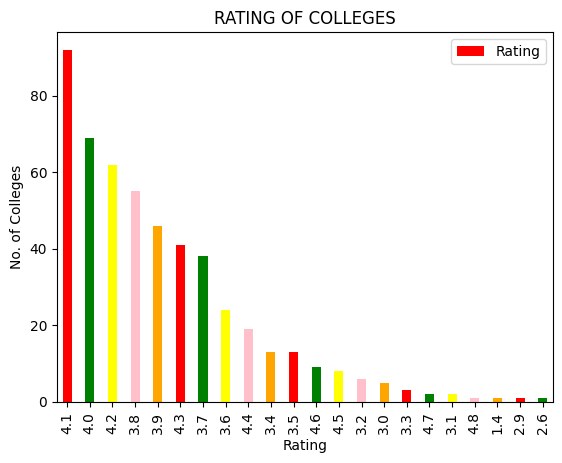

In [161]:
#BAR CHART FOR RATINGS
Data1 = College_Data["Rating"].value_counts()
Data1.plot.bar(width = 0.4 , color = ["red" ,  "green" , "yellow" , "pink" , "orange"])
plt.legend()
plt.title("RATING OF COLLEGES")
plt.xlabel("Rating")
plt.ylabel("No. of Colleges")
plt.show()

Observation:
       MOstly colleges having a good rating that is above 4.0

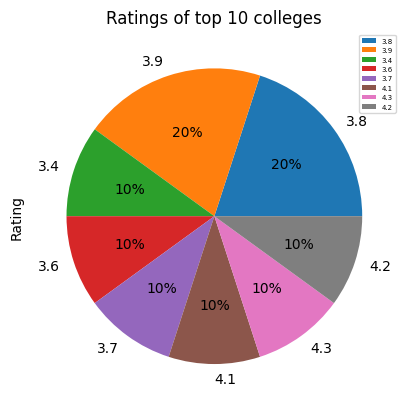

In [163]:
# PIE CHART OF TOP TEN COLLEGES ON FEE
Data6 = Top_10fee["Rating"].value_counts()
Data6.plot.pie(autopct='%.0f%%')
plt.title("Ratings of top 10 colleges")
plt.legend(fontsize=5)
plt.show()

Observation:
            From 10 ten colleges , 10% colleges having  rating of 4.3 which is maximum

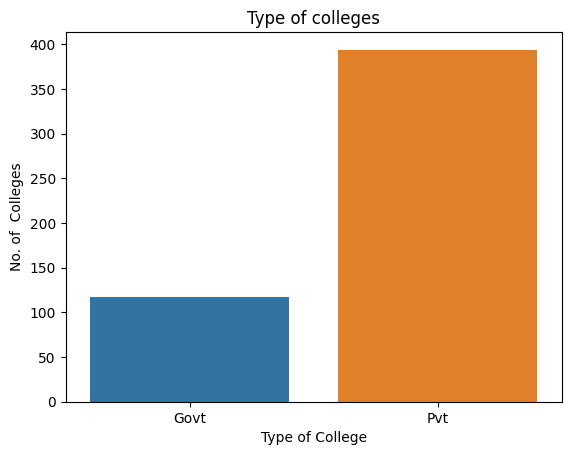

In [164]:
sns.countplot(x = "College Type", data=College_Data)
plt.title("Type of colleges")
plt.xlabel("Type of College")
plt.ylabel("No. of  Colleges")
plt.show()

Observation:
           there are 110 govt and 390 are private colleges in the count of 500

<Axes: >

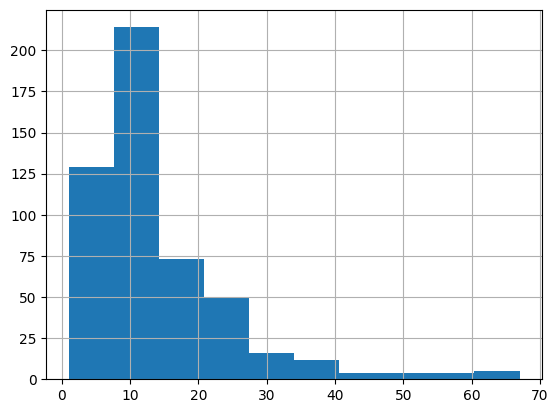

In [165]:
#plotting histogram for  analysing the columns of data frame

College_Data['Courses Offered'].hist()

Observation:
    More than 200 colleges are offerering 10 courses

<Axes: >

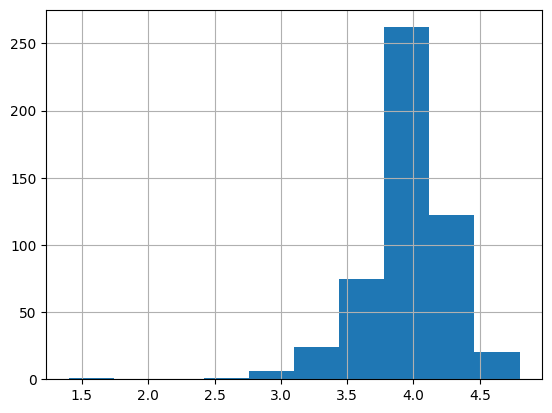

In [187]:
College_Data['Rating'].hist()

Observation:
    there are more than 250 colleges which are having a good rating of 4.0

<Axes: >

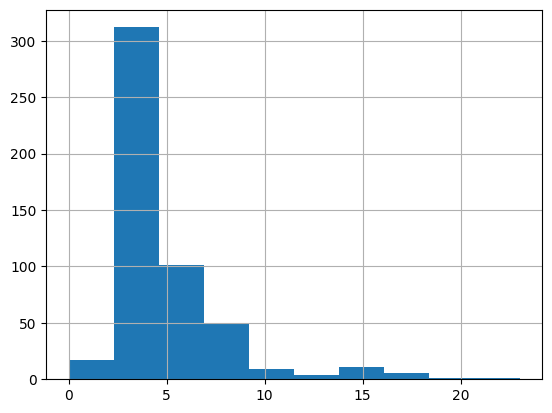

In [188]:
College_Data['Average Package'].hist()

Observation:
        There are more than 300 colleges who is giving placement of minimum 4 lpa

<Axes: >

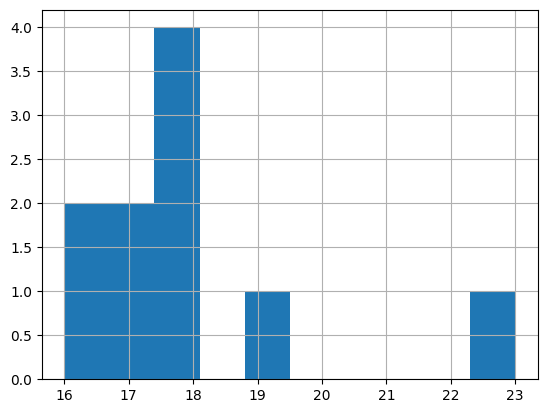

In [190]:
Top_10Package['Average Package'].hist()

Observation : 
       Top 10 colleges giving placement in between 16 to 23 lpa

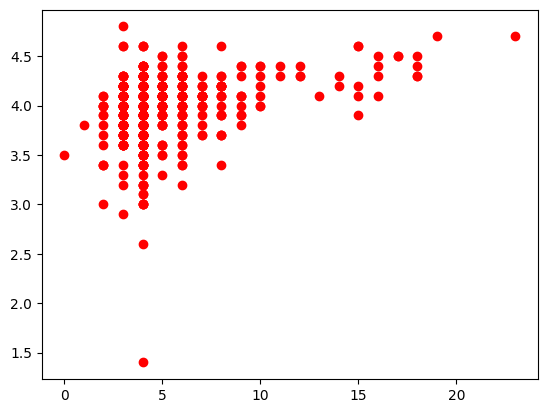

In [191]:
plt.scatter(College_Data["Average Package"] , College_Data["Rating"] , color = "red")

Obbservation:
         We are having a good correlation between Rating and package

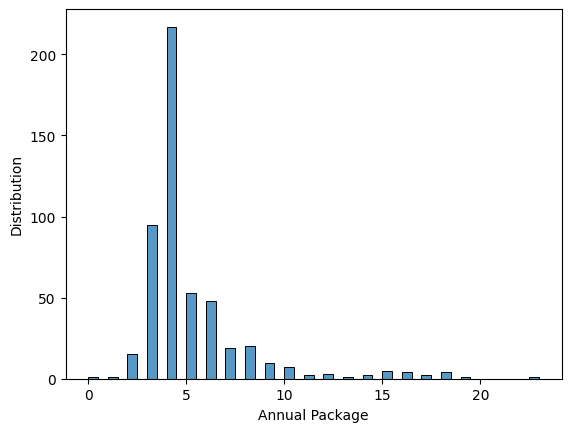

In [183]:
## Hist plot of packages and fee
sns.histplot(College_Data["Average Package"])
plt.xlabel("Annual Package")
plt.ylabel("Distribution")
plt.show()

Observation:
         Maximum colleges are giving placement of 4 lpa

BIVARIATE ANALYSIS

i) Numerical & Numerical a. Scatterplot b. Line plot c. Heatmap for correlation d. Joint plot ii) Numerical & Categorical a. Bar chart b. Violin plot iii) Categorical & Categorical a. Bar chart b. Grouped bar chart

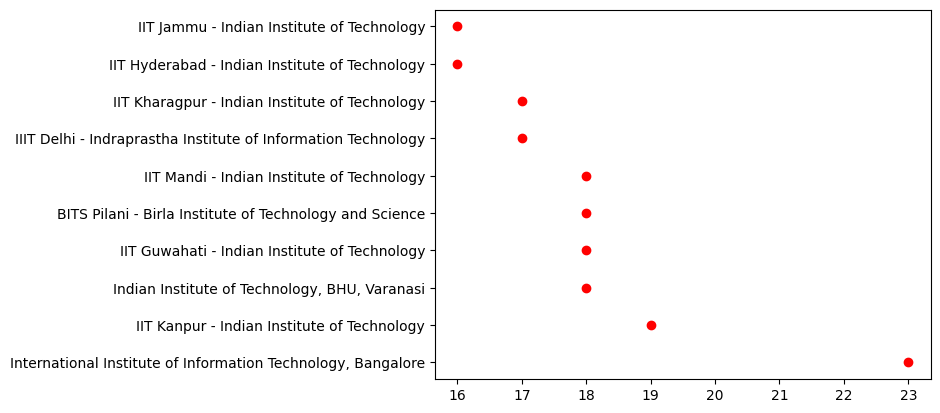

In [171]:
#Visualizing the data using scatter plot between Fee and package
plt.scatter(Top_10Package["Average Package"] , Top_10Package["College Name"] , color = "red")

Observation: All IIT's are having a good package 

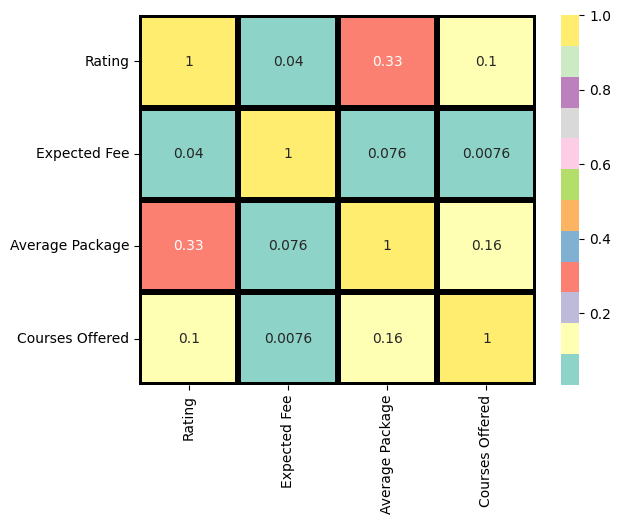

In [173]:
sns.heatmap(College_Data.corr() , annot = True , cmap = "Set3" , linecolor = "black" , linewidth = 4)
plt.show()

Observation:
    There is a good correlation between Rating , fees ,  package.

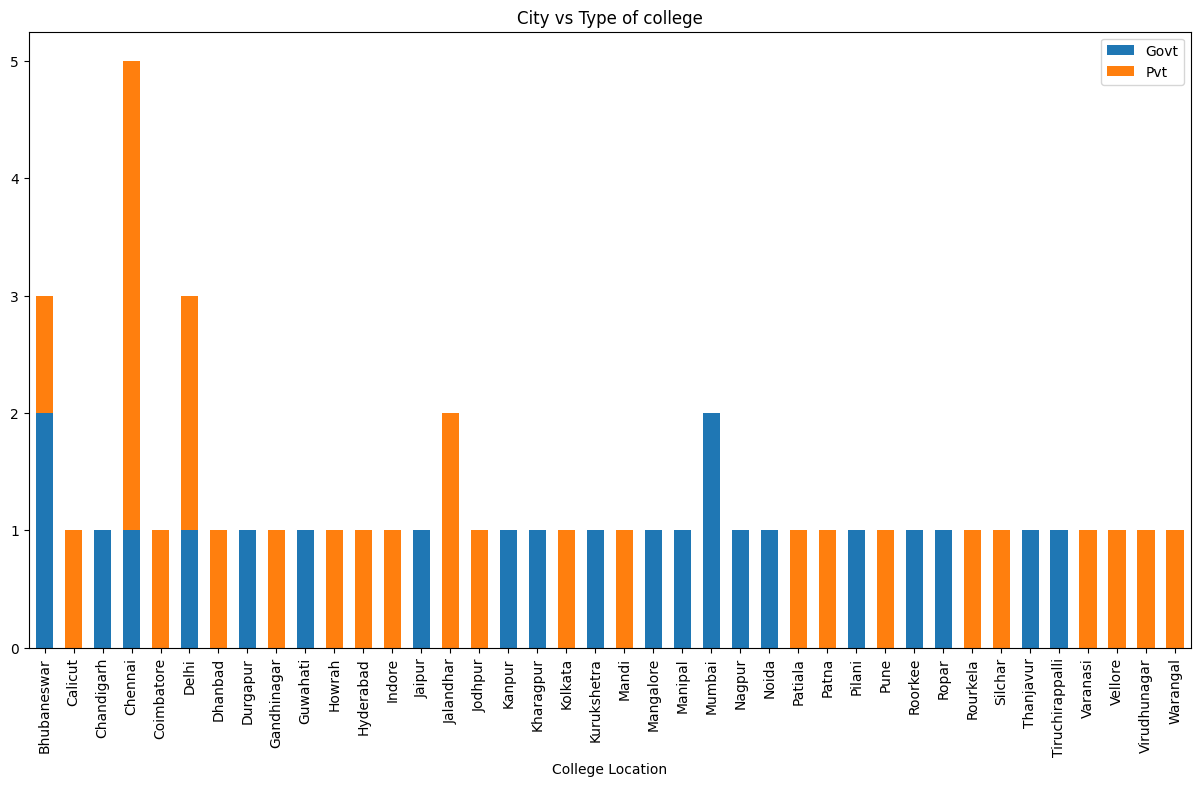

In [175]:
fig , ax = plt.subplots(figsize = (15,8))
pd.crosstab(College_Data["College Location"][0:50] , College_Data["College Type"][0:50]).plot(kind = "bar" , ax = ax , width = 0.6 , stacked = True)
plt.title('City vs Type of college')
plt.legend(bbox_to_anchor = (1,1))

Multivariate Analysis

In [184]:
# Now plotting the Profile Report  of our whole data

Profile = ProfileReport(College_Data , title = 'College Data')
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [185]:
# saving this file in HTML
Profile.to_file("DATAPROJECT.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [186]:
## Publishing the data  in tableau form

pg.walk(College_Data)
